# Manhattan Tree Data Analysis

Exploratory analysis of data from Manhattan trees surveyed in 2015 from [NYC OpenData: 2015 Street Tree Census - Tree Data](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh).

This data is also available on [Google's BigQuery](https://console.cloud.google.com/marketplace/details/city-of-new-york/nyc-tree-census?filter=solution-type:dataset&q=nyc&id=04b7b4f1-cf42-457b-b22e-6b7430b3c347). I ran a simple query just to get the following data for only living trees in Manhattan: species name, location (latitude and longitude), and diameter at breast height (DBH):

<img style="float: left;" src="https://github.com/kristinmlee/nyc_data/raw/master/trees_sql.jpg" alt="tree SQL query" width="500"/> 
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
Here, I visually explore the dataset.

### 0. Import data and necessary Python libraries

In [1]:
import pandas as pd
import math
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
trees = pd.read_csv('https://github.com/kristinmlee/nyc_data/raw/master/nyc_trees_2015.csv')

### 1. Inspect data

Dataset contains census data for trees in Manhattan: species name, location, and size (DBH).

In [3]:
trees.head()

,spc_latin,latitude,longitude,tree_dbh
0,Platanus x acerifolia,40.750310,-74.000806,24
1,Platanus x acerifolia,40.750286,-74.002079,25
2,Platanus x acerifolia,40.750372,-74.002016,29
3,Gleditsia triacanthos var. inermis,40.746355,-73.996913,21
4,Ulmus americana,40.746201,-73.996549,21


### 1A. How many different species are there in Manhattan and how rare/common are they?

In [4]:
species = trees['spc_latin']

In [5]:
species.nunique()

122

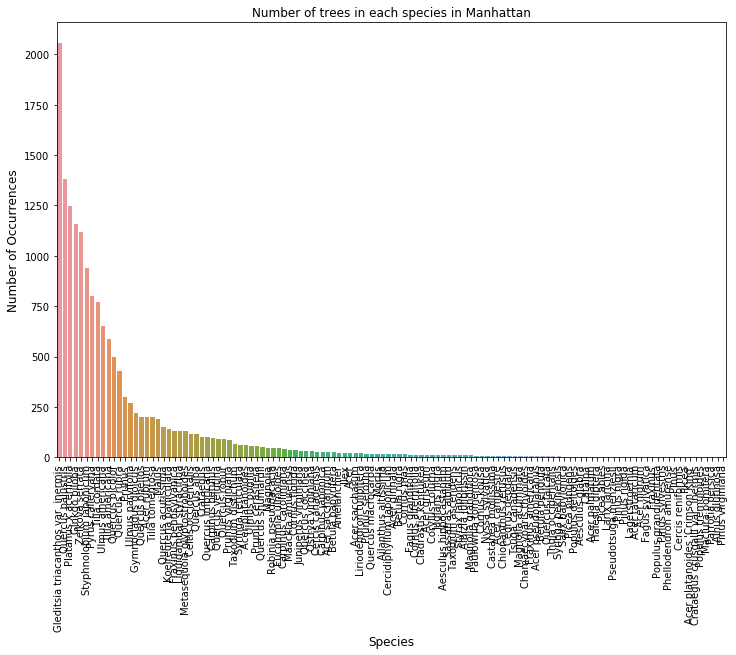

In [6]:
species_count  = species.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(species_count.index, species_count.values)
plt.xticks(rotation=90)
plt.title('Number of trees in each species in Manhattan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.show()

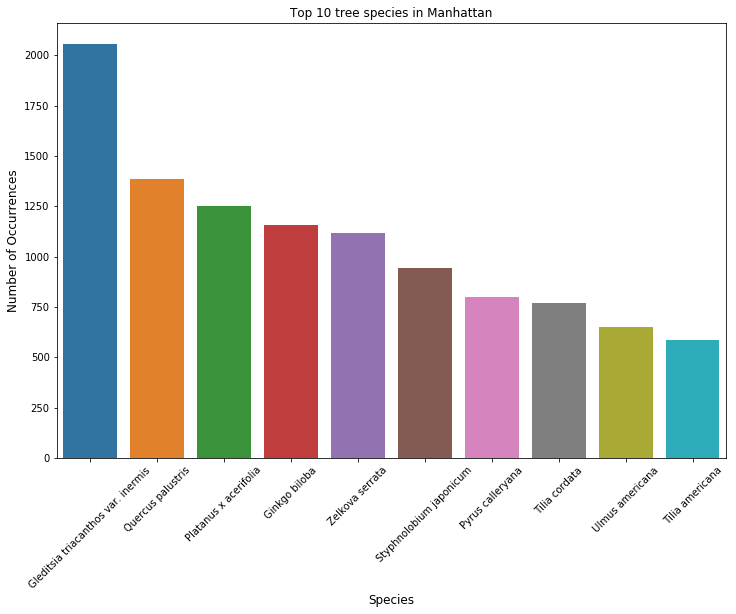

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(species_count.index[:10], species_count.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 tree species in Manhattan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.show()

How many species have only one tree in Manhattan?

In [8]:
species_count[species_count == 1].shape

(10,)

How many species have less than 10 trees in Manhattan?

In [9]:
species_count[species_count < 10].shape

(48,)

What percentage of species in Manhattan have less than 10 trees represented?

In [10]:
species_count[species_count < 10].shape[0] / species.nunique()

0.39344262295081966

### 1B. How many different genera are there in Manhattan and how rare/common are they?

There are maybe too many species (122) in Manhattan vizualize easily. We can also see that that 39% of species are rare (less than 10 trees in Manhattan). Let's focus now the next higher order of taxonomic classification and group by genus.

In [11]:
genus = species.str.split().str.get(0)

In [12]:
unique_genera = genus.unique()
unique_genera.shape

(66,)

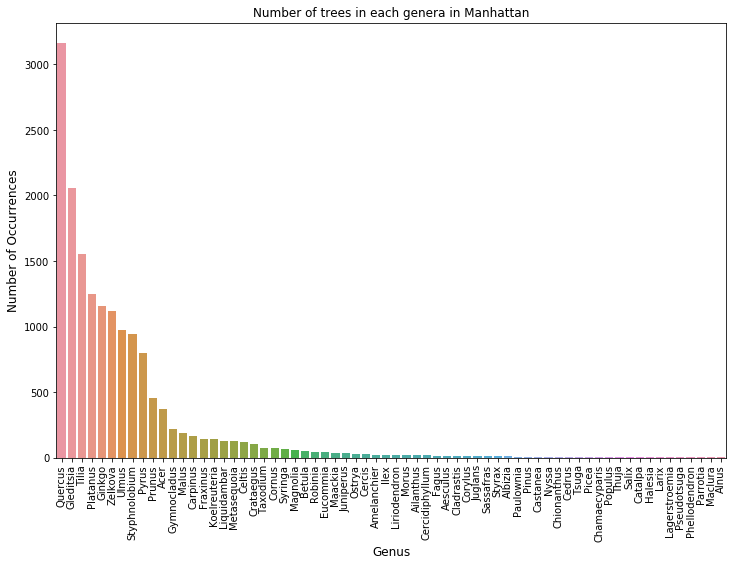

In [13]:
genus_count  = genus.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(genus_count.index, genus_count.values)
plt.xticks(rotation=90)
plt.title('Number of trees in each genera in Manhattan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genus', fontsize=12)
plt.show()

How many genera have only one tree in Manhattan?

In [14]:
genus_count[genus_count == 1].shape

(3,)

How many genera have less than 10 trees in Manhattan?

In [15]:
genus_count[genus_count < 10].shape

(22,)

What percentage of genera in Manhattan have less than 10 trees represented?

In [16]:
genus_count[genus_count < 10].shape[0] / genus.nunique()

0.3333333333333333

### 2. How are the different genera distributed in Manhattan?

We see that there are 66 unique genera in Manhattan. Again, we see many (33%) are rare (less than 10 trees). This data may be easier to visualize on a map.

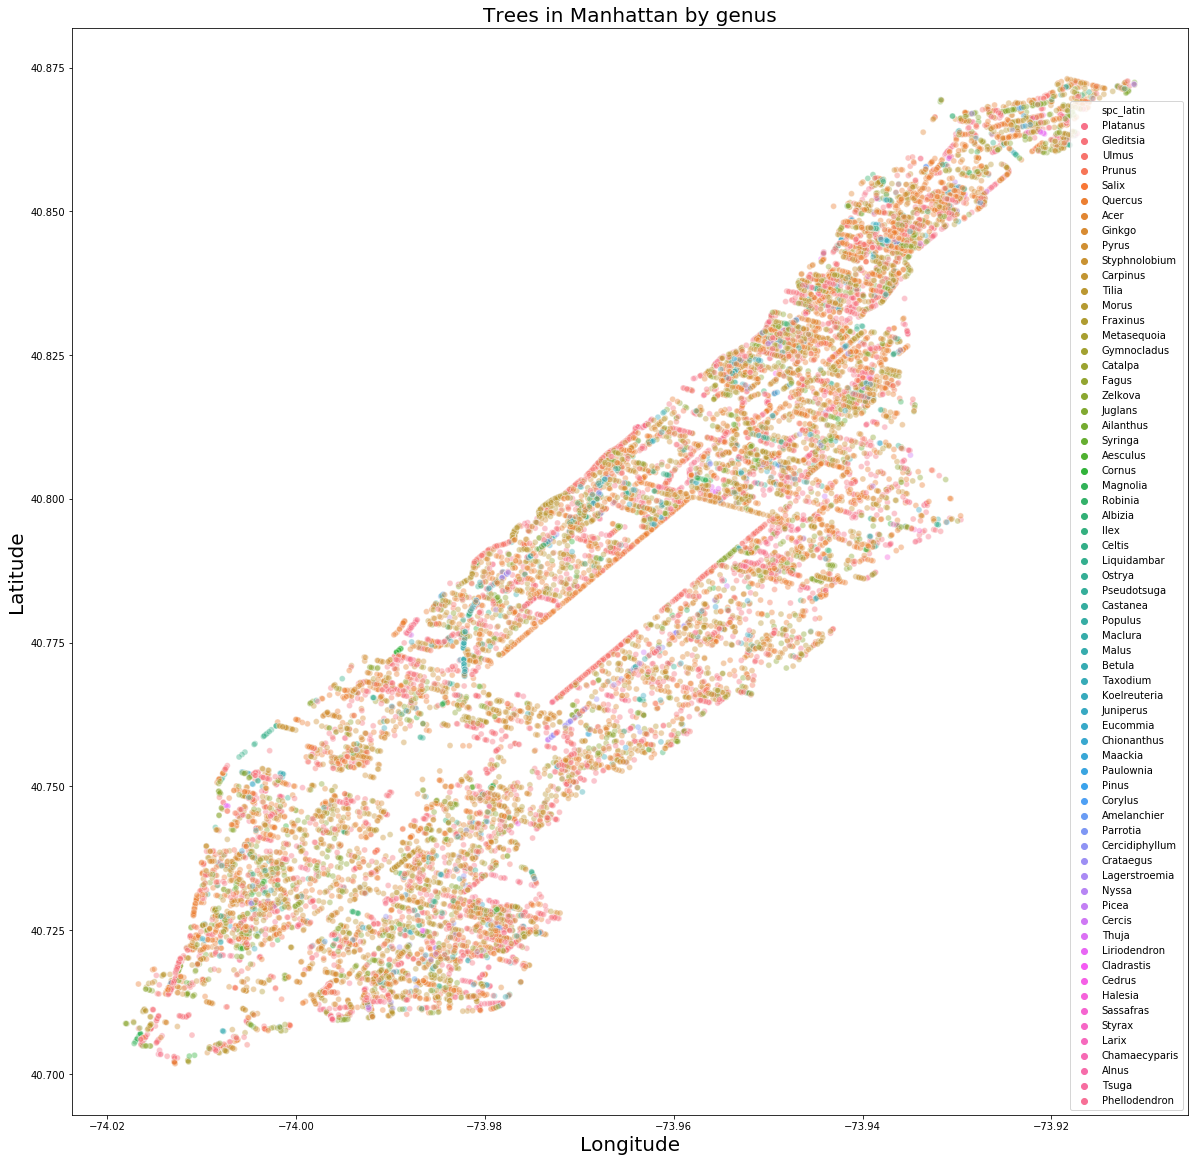

In [17]:
plt.figure(figsize=(20,20))
sns.scatterplot(x = "longitude", y = "latitude", hue = genus, data = trees, alpha = 0.4)
plt.title('Trees in Manhattan by genus', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

It is very difficult to visually discern 66 colors. Can we group by higher order taxonomic groupings? 

### 3. Group data by family and order

I found an R package ([taxonlookup](https://github.com/traitecoevo/taxonlookup) that is a lookup table for taxonomic information for land plants.

First get the unique genera in the dataset and write to CSV.

In [18]:
unique_genera_series = pd.Series(unique_genera)
unique_genera_series.to_csv('nyc_tree_genera.csv', header = False)

I then did the following in R ([code here]:(https://github.com/kristinmlee/nyc_data/blob/master/nyc_tree_getFamilyOrder.R))

<img style="float: left;" src="https://github.com/kristinmlee/nyc_data/raw/master/trees_getOrder_R.png" alt="tree SQL query" width="1000"/> 


### 4. How are the different families and orders distributed in Manhattan?

Read CSV generated above.

In [22]:
tree_higher = pd.read_csv('https://github.com/kristinmlee/nyc_data/raw/master/nyc_trees_2015_family.csv')
tree_higher.head()

,genus,family,order
0,Platanus,Platanaceae,Proteales
1,Platanus,Platanaceae,Proteales
2,Platanus,Platanaceae,Proteales
3,Platanus,Platanaceae,Proteales
4,Platanus,Platanaceae,Proteales


In [23]:
families = tree_higher["family"]
orders = tree_higher["order"]

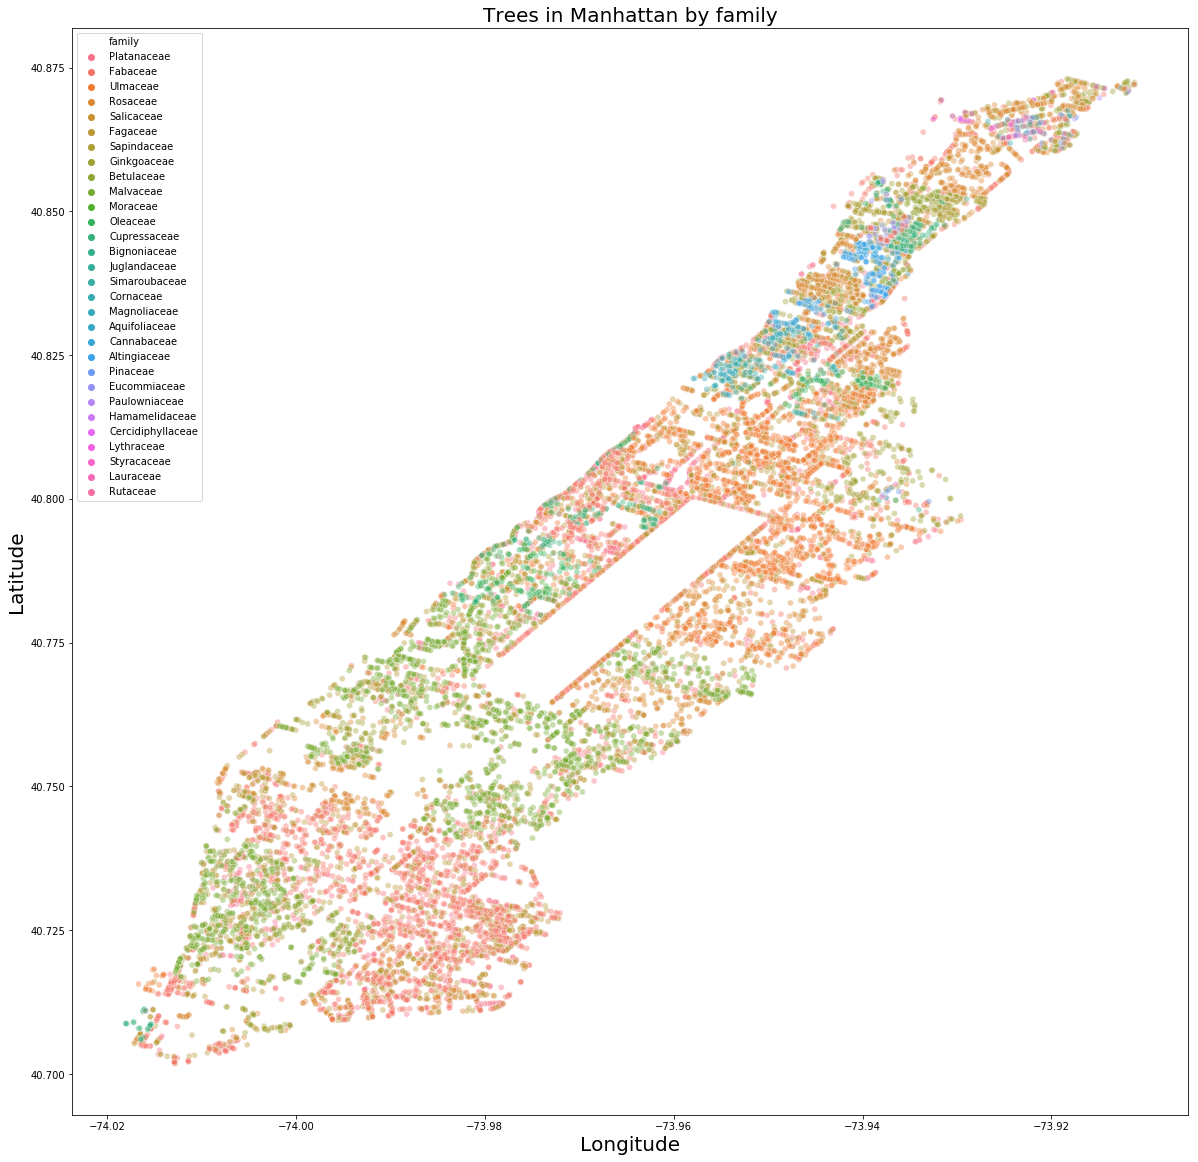

In [24]:
plt.figure(figsize=(20,20))
sns.scatterplot(x = "longitude", y = "latitude", hue = families, data = trees, alpha = 0.4)
plt.title('Trees in Manhattan by family', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

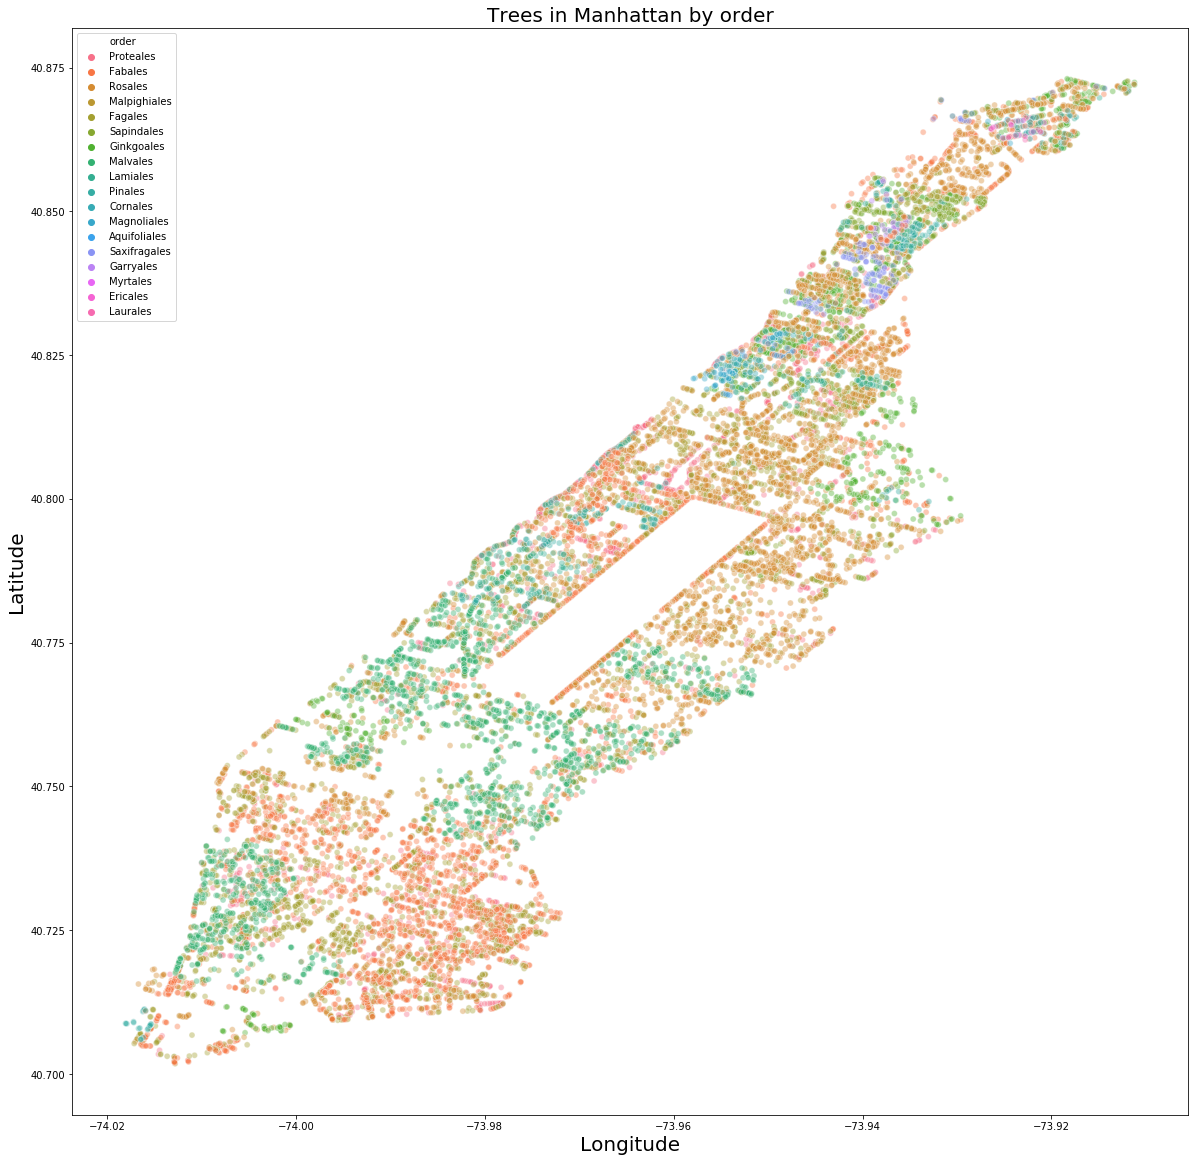

In [25]:
plt.figure(figsize=(20,20))
sns.scatterplot(x = "longitude", y = "latitude", hue = orders, data = trees, alpha = 0.4)
plt.title('Trees in Manhattan by order', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

This is much easier to visualize with fewer groupings/colors. We can see there is not a lot of diversity downtown whereas further north we see most of the rare groups clustering. Would be interesting to calculate number of orders above and below a certain street (or above/below a given latitude would be easier).

### 5. Incorporate information about tree size.

First, get distribution of diameters for all trees.

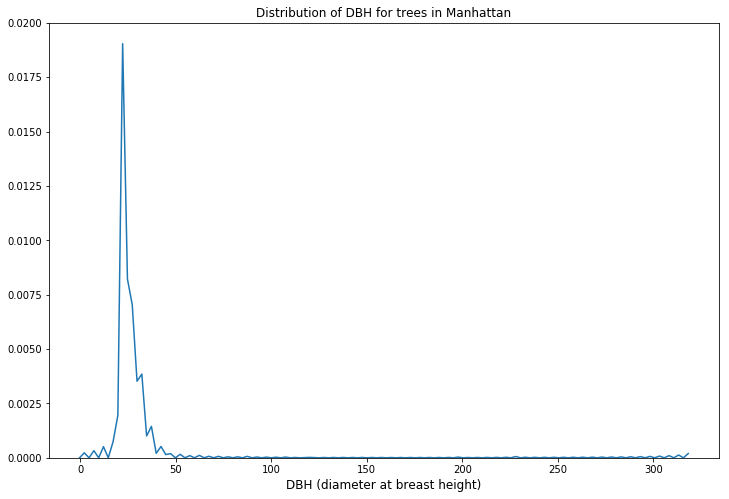

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(trees['tree_dbh'], hist = False)
plt.title('Distribution of DBH for trees in Manhattan', fontsize=12)
plt.xlabel('DBH (diameter at breast height)', fontsize=12)
plt.show()

We see that many trees are between 10-40 inches diameter but there is a very long tail (i.e. a few trees are very large).

Next, let's visualize this spread by order.

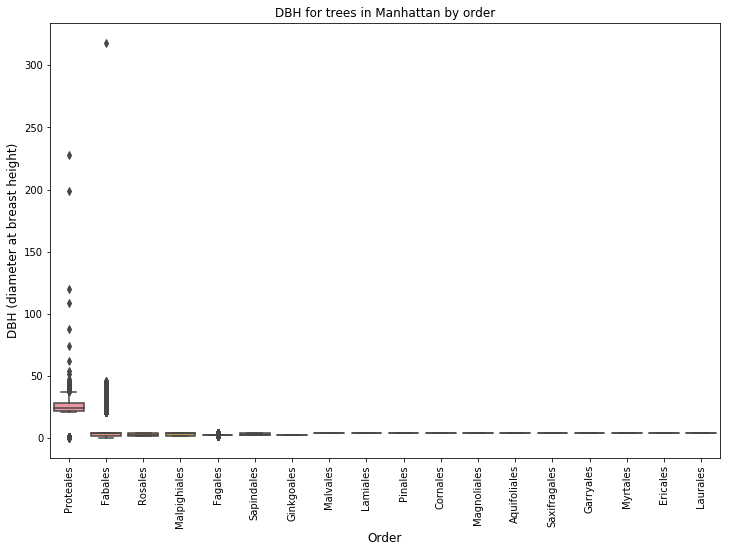

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x=orders, y='tree_dbh', data=trees)
plt.title('DBH for trees in Manhattan by order', fontsize=12)
plt.ylabel('DBH (diameter at breast height)', fontsize=12)
plt.xlabel('Order', fontsize=12)
plt.xticks(rotation=90)
plt.show()

We see that the big trees are in two orders: Proteales (predominantly sycamores in Manhattan) and Fabales (predominantly honey locusts in Manhattan). Let's only focus on small trees for plotting.

Remove all with diameter < 40 

In [28]:
small_trees = trees[trees['tree_dbh'] < 40] 

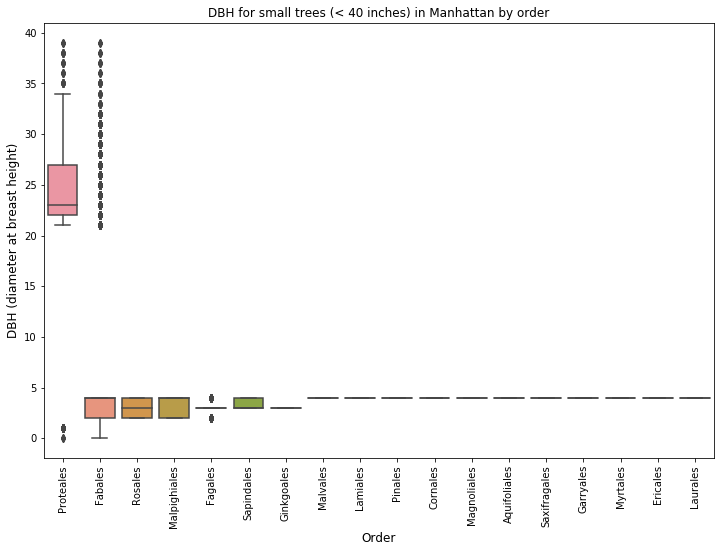

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x=orders, y='tree_dbh', data=small_trees)
plt.title('DBH for small trees (< 40 inches) in Manhattan by order', fontsize=12)
plt.ylabel('DBH (diameter at breast height)', fontsize=12)
plt.xlabel('Order', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Now plot location and have varying size points for DBH to visualize sizes of trees. 

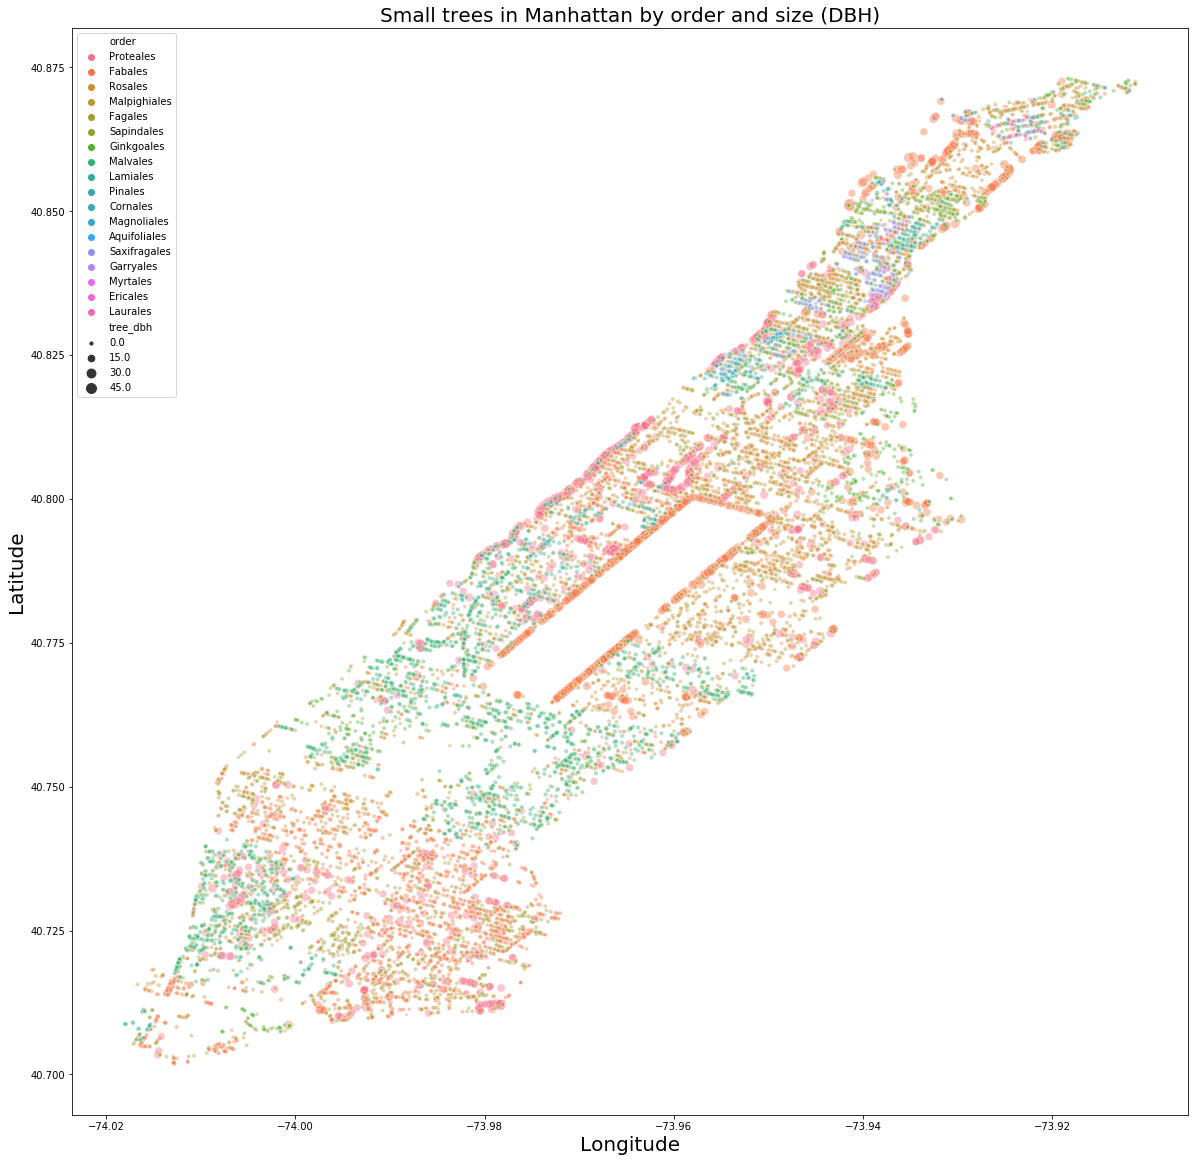

In [30]:
plt.figure(figsize=(20,20))
sns.scatterplot(x = "longitude", y = "latitude", hue = orders, size = 'tree_dbh', data = small_trees, alpha = 0.4, sizes = (10,100))
plt.title('Small trees in Manhattan by order and size (DBH)', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

I'm curious where all the large trees are located.

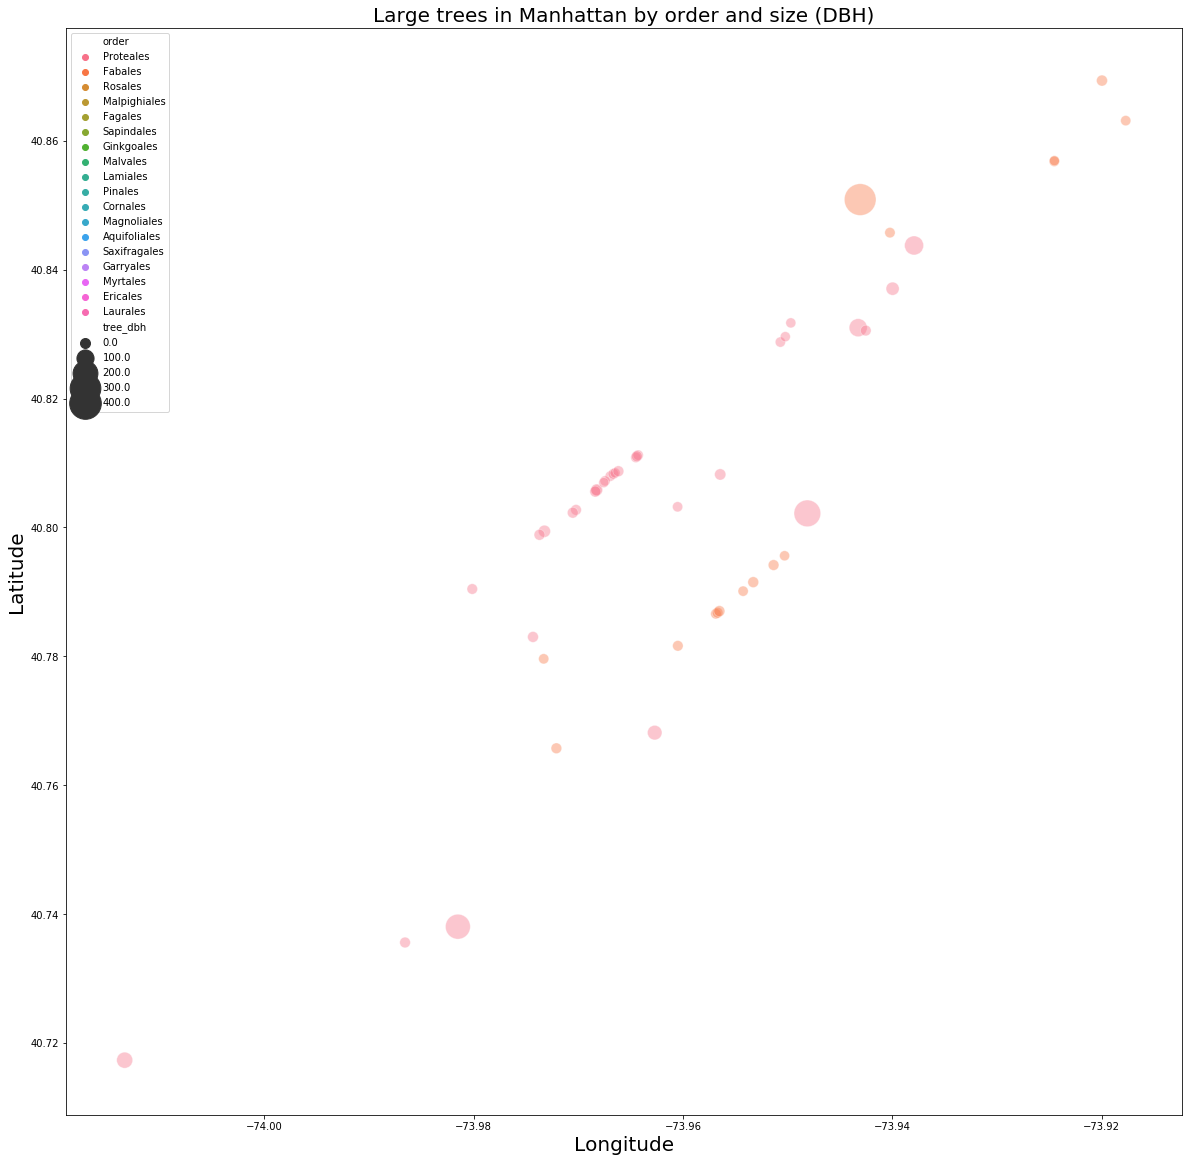

In [31]:
large_trees = trees[trees['tree_dbh'] >= 40] 

plt.figure(figsize=(20,20))
sns.scatterplot(x = "longitude", y = "latitude", hue = orders, size = 'tree_dbh', data = large_trees, alpha = 0.4, sizes = (100,1000))
plt.title('Large trees in Manhattan by order and size (DBH)', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

### 6. Experimenting with plotting on maps.

It looks like the larger trees (at least in the smaller trees) are located around parks. For example, they are lining Central Park (the big section without data) and Riverside Park (the edge of Manhattan at about 40.8° N, 73.97° W). There also is a lack of trees in dense areas with tall building (e.g. Midtown and the Financial District).

It would be interesting to include a map of Manhattan (with parks and other features) and plot these points on top.

More work is needed here but I started experimenting with geopandas library to produce to following.

Text(0.5, 281.35746076522645, 'Longitude')

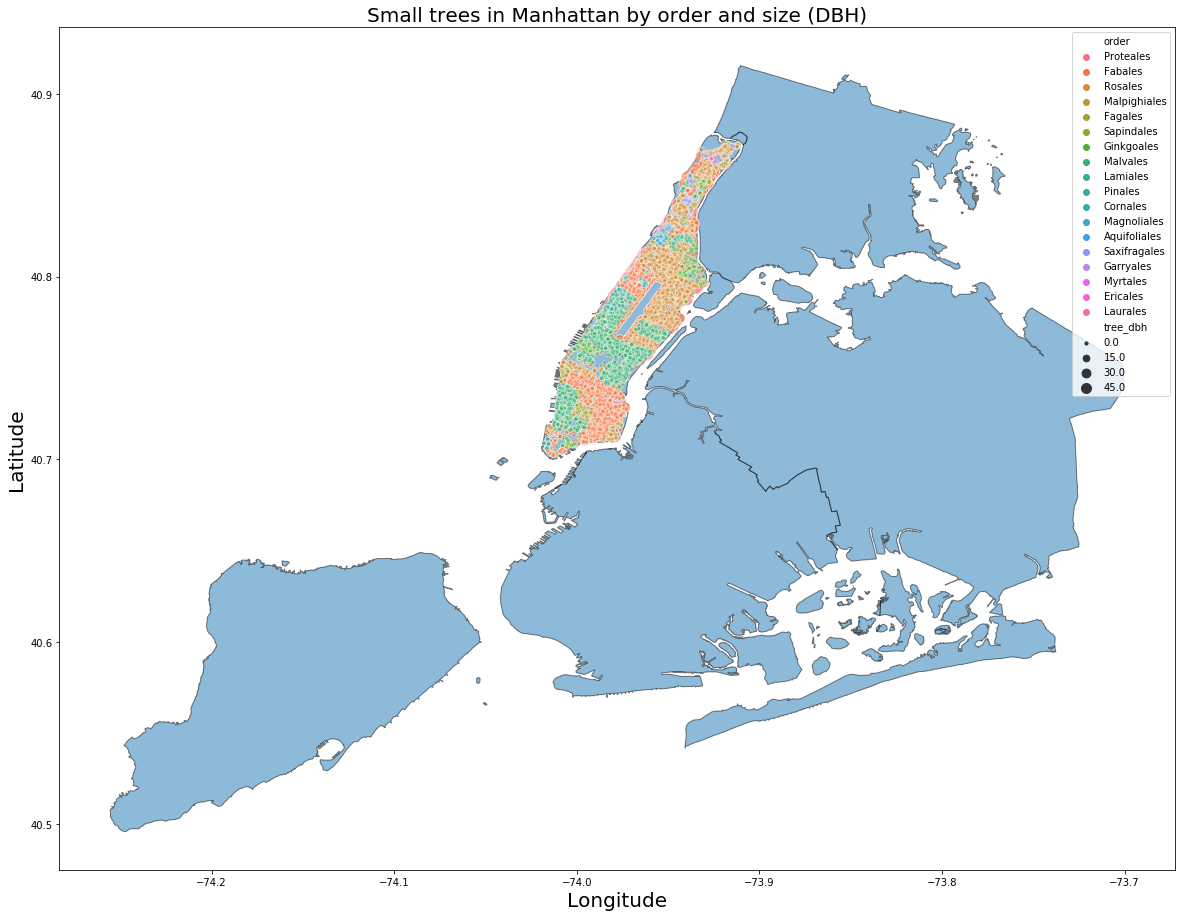

In [32]:
df = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(epsg='4326')
df.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')

sns.scatterplot(x = "longitude", y = "latitude", hue = orders, size = 'tree_dbh', data = small_trees, alpha = 0.4, sizes = (10,100))
plt.title('Small trees in Manhattan by order and size (DBH)', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)

There is a lot more work to be done with mapping. Right now, this is plotting all of New York City and I only have tree data for Manhattan. Also, ideally I would include more than the borough boundries, but this is what is available with "nybb" in Geopandas. I will explore other libraries.

There are a lot of other interesting questions to address with this simple data set but likely I will need to incorporate other data (e.g. locations of parks, etc.) to analyze further.